# Seaborn

<div style="text-align: right"> david.hannon@wmg.com </div>
<div style="text-align: right"> 2019-10-30</div>

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("input/data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
Number       800 non-null int64
Name         800 non-null object
Type1        800 non-null object
Type2        414 non-null object
Total        800 non-null int64
HP           800 non-null int64
Attack       800 non-null int64
Defense      800 non-null int64
SAtk         800 non-null int64
SDef         800 non-null int64
Speed        800 non-null int64
Gen          800 non-null int64
Legendary    800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [4]:
sns.set(
    style   = "darkgrid",
    palette = "deep",
    font    = "Fira Code",
    context = "notebook")
plt.rcParams["figure.figsize"] = (15, 10)

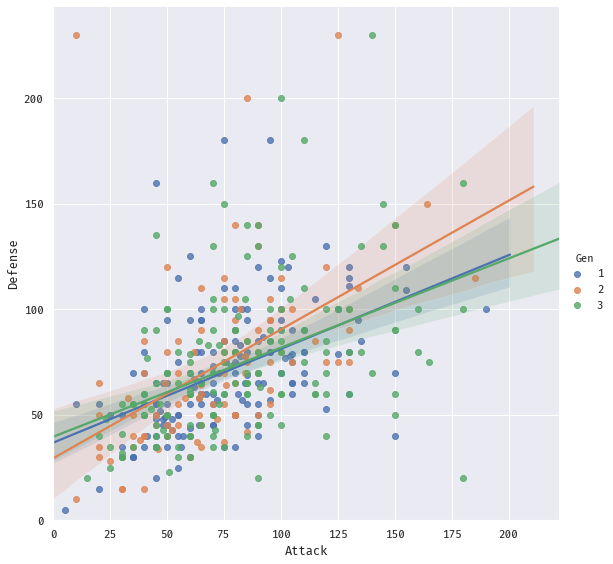

In [5]:
sns.lmplot(x = "Attack", y = "Defense", data = df[df.Gen <= 3], hue = "Gen", height = 8, fit_reg = True)
plt.ylim(0, None)
plt.xlim(0, None)
plt.show()

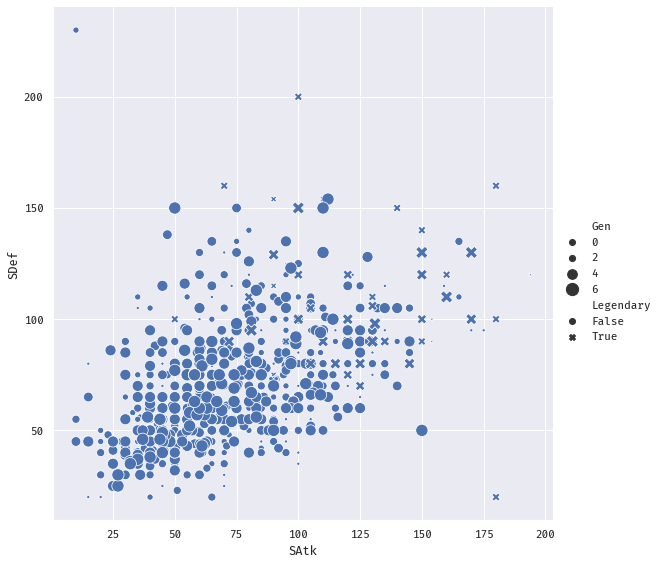

In [6]:
sns.relplot(x = "SAtk", y = "SDef", data = df, size = "Gen", sizes = (10, 150), height = 8, style = "Legendary")
plt.show()

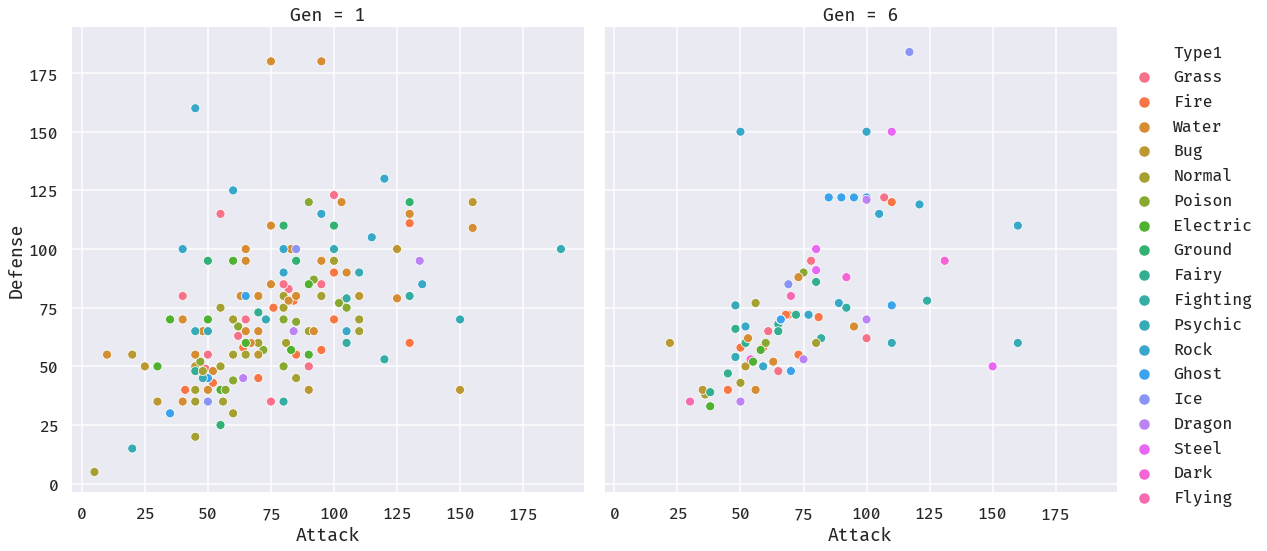

In [7]:
with sns.plotting_context("talk"):
    sns.relplot(
        x      = "Attack",
        y      = "Defense",
        col    = "Gen",
        hue    = "Type1",
        height = 8,
        data   = df.query("Gen == 1 or Gen == 6"))

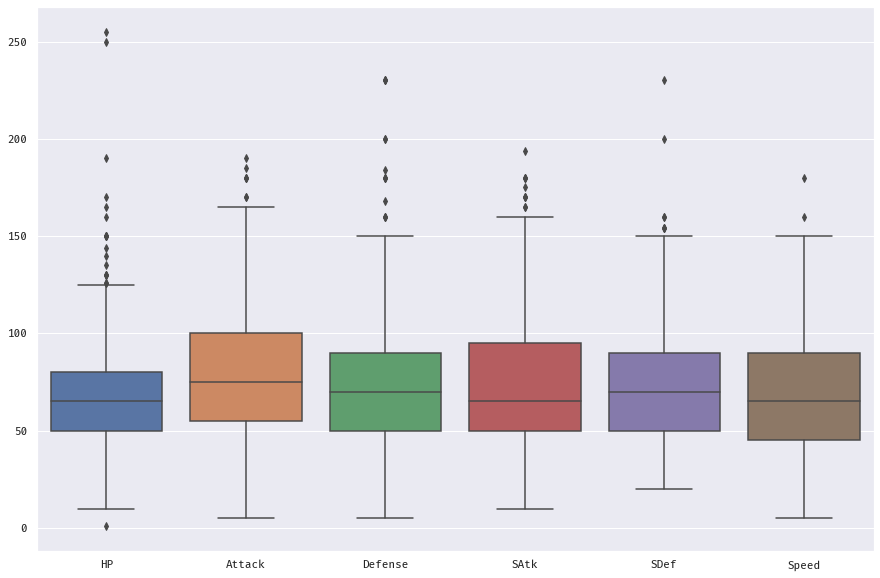

In [8]:
sns.boxplot(data = df.drop(["Number", "Total", "Gen", "Legendary"], axis = 1))
plt.show()

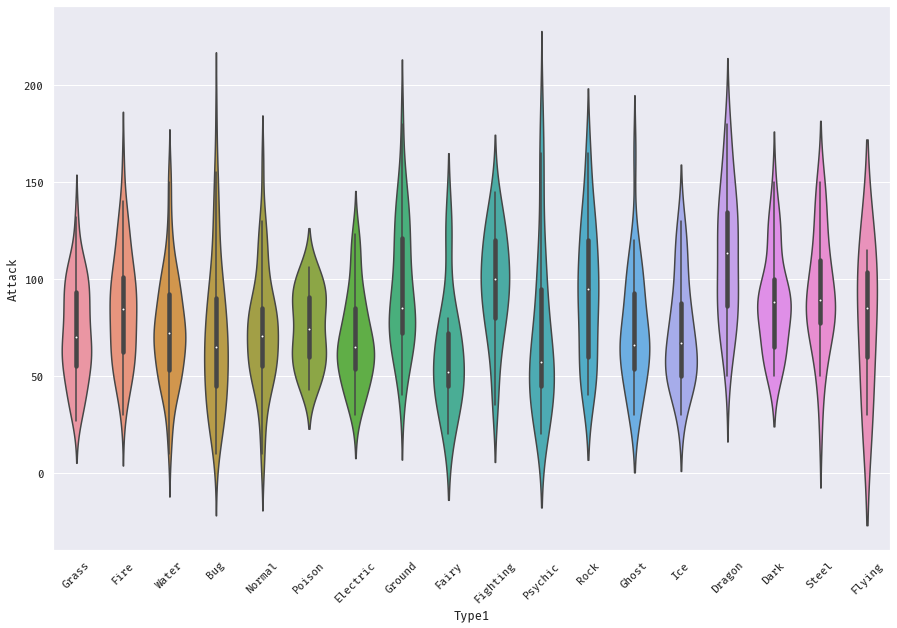

In [9]:
vplot = sns.violinplot(x = "Type1" , y = "Attack" , data = df)
vplot.set_xticklabels(vplot.get_xticklabels() , rotation = 45)
plt.show()

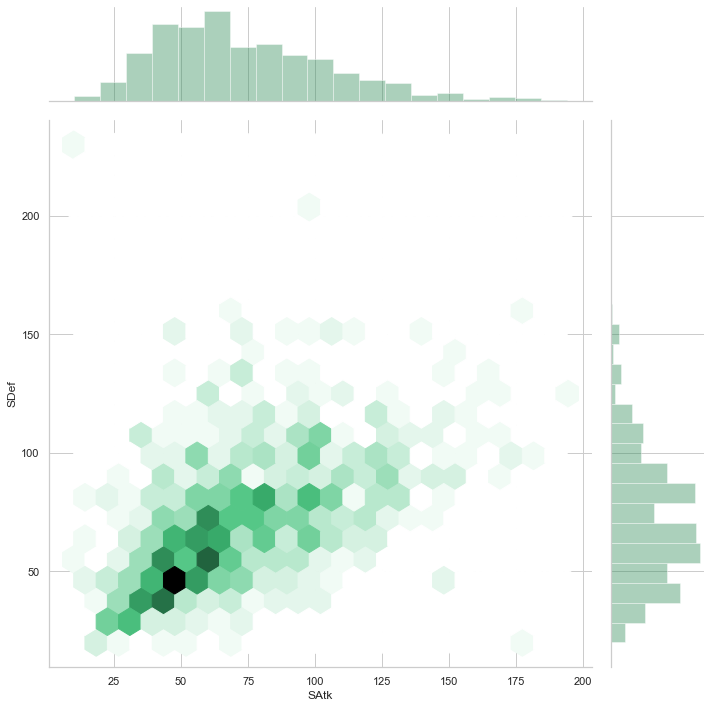

In [10]:
with sns.axes_style("whitegrid"):
    sns.jointplot(x = "SAtk", y = "SDef", data = df, kind = "hex", color = "seagreen", height = 10)
    plt.show()

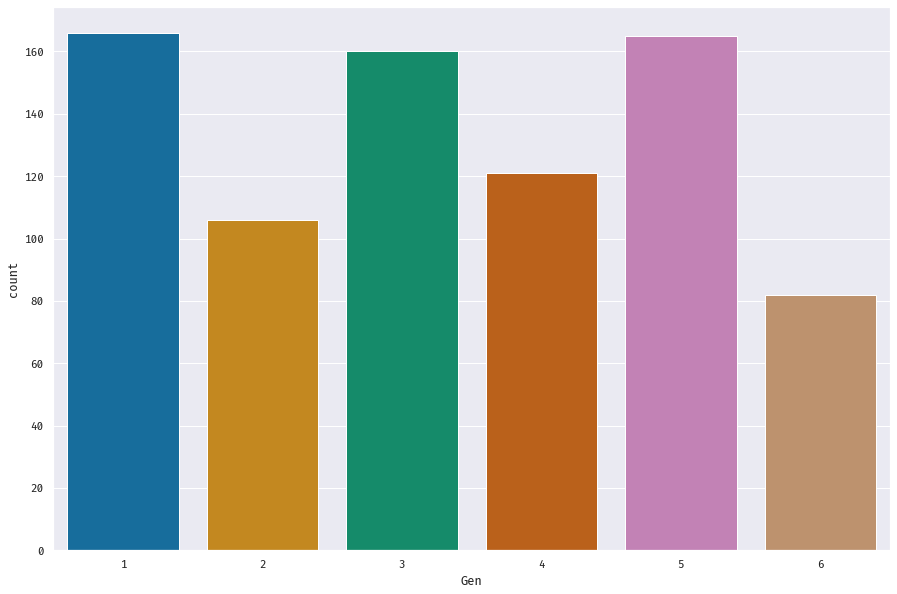

In [11]:
with sns.color_palette("colorblind"):
    sns.countplot(x = "Gen", data = df)
    plt.show()

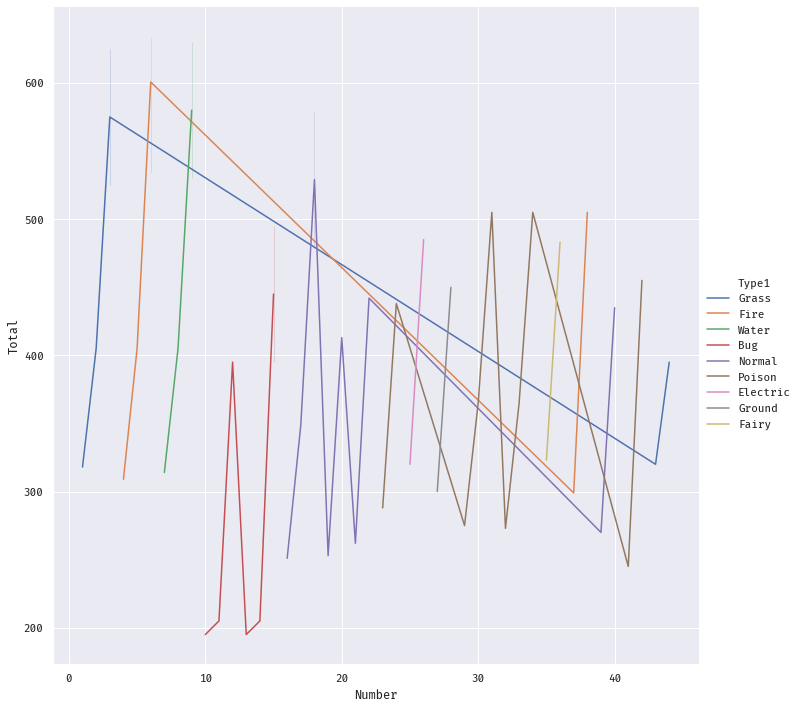

In [12]:
sns.relplot(x = "Number", y = "Total", hue = "Type1", data = df.head(50), kind = "line", height = 10)
plt.show()

,Name,Type1,Type2,HP,Attack,Defense,SAtk,SDef,Speed,Legendary
68,Abra,Psychic,NaN,25,20,15,105,55,90,False
69,Kadabra,Psychic,NaN,40,35,30,120,70,105,False
70,Alakazam,Psychic,NaN,55,50,45,135,95,120,False
71,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
104,Drowzee,Psychic,NaN,60,48,45,43,90,42,False
105,Hypno,Psychic,NaN,85,73,70,73,115,67,False
131,Mr. Mime,Psychic,Fairy,40,45,65,100,120,90,False
162,Mewtwo,Psychic,NaN,106,110,90,154,90,130,True
163,Mega Mewtwo X,Psychic,Fighting,106,190,100,154,100,130,True
164,Mega Mewtwo Y,Psychic,NaN,106,150,70,194,120,140,True


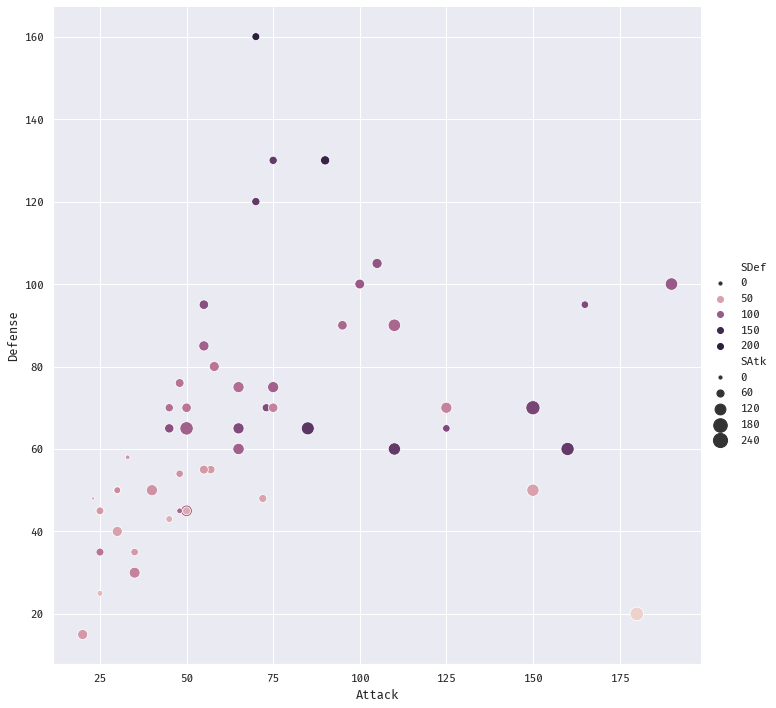

In [13]:
subset = (df.query("Type1 == 'Psychic'").drop(["Number", "Total", "Gen"], axis = 1))
display(subset.head(10))
sns.relplot(
    x      = "Attack",
    y      = "Defense",
    size   = "SAtk",
    hue    = "SDef",
    data   = subset,
    height = 10,
    sizes  = (10, 200))
plt.show()